In [1]:
import pandas_datareader.data as pdr

def get_stock_data(code):
  df = pdr.DataReader("{}.JP".format(code), "stooq").sort_index()
  return df

In [2]:
pip install mplfinance

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
df = get_stock_data(6670)

In [5]:
import talib as ta

df = get_stock_data(6670)  # (株)MCJ(6670)の株価を取得

# 終値からMACDを計算
close = df['Close']           
macd, macdsignal, _ = ta.MACD(close,
                                     fastperiod=12, slowperiod=26, signalperiod=9)
df['macd'] = macd
df['macd_signal'] = macdsignal
df.tail()

,Open,High,Low,Close,Volume,macd,macd_signal
Date,,,,,,,
2022-03-04,978.0,982.0,952.0,953.0,237500,-6.721758,-6.359616
2022-03-07,950.0,954.0,918.0,919.0,297500,-11.727470,-7.433187
2022-03-08,910.0,918.0,897.0,902.0,267100,-16.871803,-9.320910
2022-03-09,911.0,911.0,887.0,898.0,208400,-21.029080,-11.662544
2022-03-10,927.0,937.0,919.0,930.0,140400,-21.493852,-13.628806


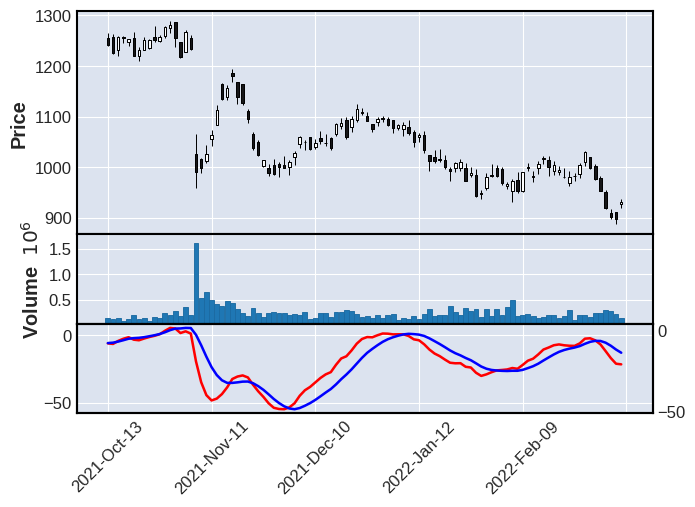

In [6]:
import mplfinance as mpf
mdf = df.tail(100) # 直近100日分のデータ
apd  = [
    mpf.make_addplot(mdf['macd'], panel=2, color='red'),# パネルの2番地に赤で描画
    mpf.make_addplot(mdf['macd_signal'], panel=2, color='blue'), 
]
mpf.plot(mdf, type='candle', volume=True, addplot=apd)

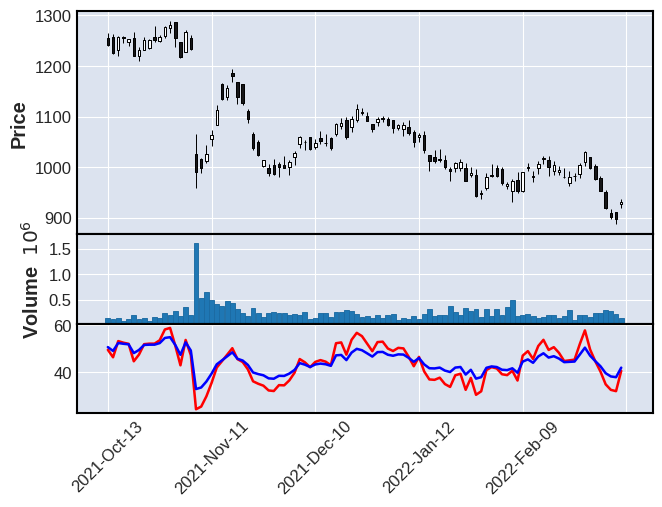

In [7]:
rsi14 = ta.RSI(close, timeperiod=14)
rsi28 = ta.RSI(close, timeperiod=28)
df['rsi14'], df['rsi28'] = rsi14, rsi28

mdf = df.tail(100)
apd  = [
    mpf.make_addplot(mdf['rsi14'], panel=2, color='red'),
    mpf.make_addplot(mdf['rsi28'], panel=2, color='blue')
]
mpf.plot(mdf, type='candle', volume=True, addplot=apd)

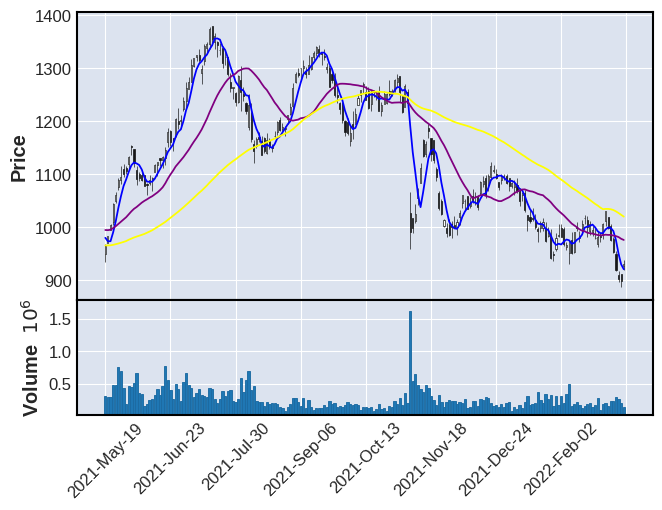

In [8]:
ma5, ma25, ma75  = ta.SMA(close, timeperiod=5), ta.SMA(close, timeperiod=25), ta.SMA(close, timeperiod=75)
df['ma5'], df['ma25'], df['ma75'] = ma5, ma25, ma75

mdf = df.tail(200)

apd  = [
    mpf.make_addplot(mdf['ma5'], panel=0, color='blue'),
    mpf.make_addplot(mdf['ma25'], panel=0, color='purple'),
    mpf.make_addplot(mdf['ma75'], panel=0, color='yellow'),
]
mpf.plot(mdf, type='candle', volume=True, addplot=apd)

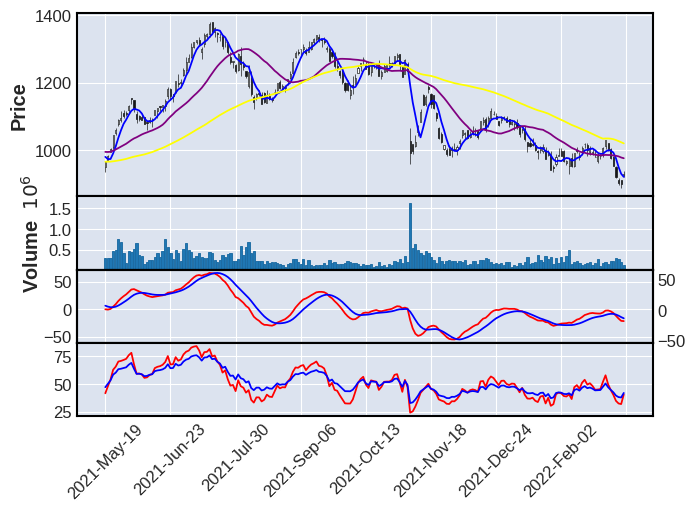

In [9]:
mdf = df.tail(200)
apd  = [
    mpf.make_addplot(mdf['ma5'], panel=0, color='blue'),
    mpf.make_addplot(mdf['ma25'], panel=0, color='purple'),
    mpf.make_addplot(mdf['ma75'], panel=0, color='yellow'),
    mpf.make_addplot(mdf['macd'], panel=2, color='red'),
    mpf.make_addplot(mdf['macd_signal'], panel=2, color='blue'),
    mpf.make_addplot(mdf['rsi14'], panel=3, color='red'),
    mpf.make_addplot(mdf['rsi28'], panel=3, color='blue')
]
mpf.plot(mdf, type='candle', volume=True, addplot=apd)